**【問題1】ダーツのまとを選ぶ**  
ダーツのまとを選ぶためにサイコロを実装しましょう。  
《ヒント》  
「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [1]:
import numpy as np
dice_array = np.arange(1, 7)
chosen_dice = np.array([]).astype(np.int64)
np.random.seed(0)
for _ in range(1000):
    chosen_dice = np.append(chosen_dice, np.random.choice(dice_array))

print(np.bincount(chosen_dice))

[  0 171 157 157 183 161 171]


**【問題2】ダーツを投げて、刺さった場所を記録する**  
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。  
《ヒント》  
ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。  
また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

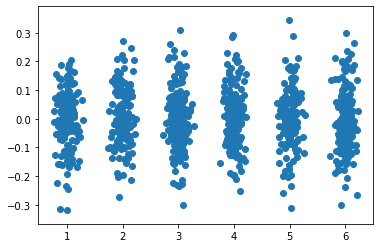

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# サイコロを振る回数=ダーツを投げる回数を定義
dice_dart_num = 1000

chosen_dice = []
# サイコロを振り、出た目をリストdice_arrayに格納する
dice_array = np.arange(1, 7)
chosen_dice = np.array([]).astype(np.int64)
for _ in range(dice_dart_num):
    chosen_dice = np.append(chosen_dice, np.random.choice(dice_array))

mean = [0, 0]
cov = [[0.01, 0], [0, 0.01]]
generate_normal = np.random.multivariate_normal(mean, cov, dice_dart_num)

dart_position = np.array([chosen_dice, np.zeros(dice_dart_num)]).T + generate_normal

plt.scatter(dart_position[:, 0], dart_position[:, 1])
plt.show()

**【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する**  
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。  
《ヒント》  
「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [3]:
keys = chosen_dice
values = dart_position
dice_dartposition_dictionary = {}

for key, value in zip(keys, values):
    if str(key) not in dice_dartposition_dictionary:
        dice_dartposition_dictionary[str(key)] = []
    dice_dartposition_dictionary[str(key)].append(value)

**【問題4】ダーツのまとと刺さった位置を描画する**  
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。  
ここまで出来ていれば、最初に示したような図が描画されるはずです。

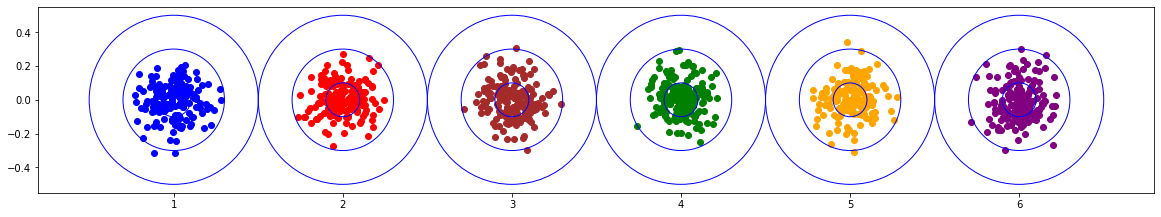

In [4]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,5))
ax = plt.axes()
colors = ['blue', 'red', 'brown', 'green', 'orange', 'purple']

for center_num, color in enumerate(colors, 1):
    for radius_num in ([0.1, 0.3, 0.5]):
        c = mpatches.Circle(xy=[center_num, 0], radius=radius_num, ec='blue', fill=False)
        ax.add_patch(c)
    plt.scatter(np.array(dice_dartposition_dictionary[str(center_num)])[:, 0], np.array(dice_dartposition_dictionary[str(center_num)])[:, 1], color=color)

plt.axis('scaled')
plt.show()

**【問題5】関数化**  
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。  
《ヒント》  
ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

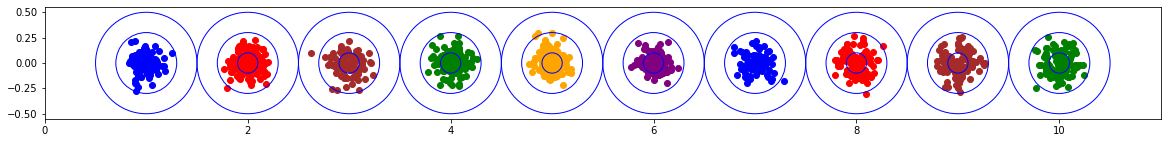

In [5]:
def dart_position_plot(dart_throw_num, dart_target_num):
    # 的の数を定義
    target_num_array = np.arange(1, dart_target_num+1)
    # サイコロを転がし、出た目をリスト内に格納
    chosen_dice = np.array([]).astype(np.int64)
    for _ in range(dart_throw_num):
        chosen_dice = np.append(chosen_dice, np.random.choice(target_num_array))
    # 平均値ベクトル共分散行列を定義し、二次元正規分布に従う座標点(x, y)を生成
    mean = [0, 0]
    cov = [[0.01, 0], [0, 0.01]]
    generate_normal = np.random.multivariate_normal(mean, cov, dart_throw_num)
    dart_position = np.array([chosen_dice, np.zeros(dart_throw_num)]).T + generate_normal
    
    keys = chosen_dice
    values = dart_position
    dice_dartposition_dictionary = {}
   
    for key, value in zip(keys, values):
        if str(key) not in dice_dartposition_dictionary:
            dice_dartposition_dictionary[str(key)] = []
        dice_dartposition_dictionary[str(key)].append(value)
    
    fig = plt.figure(figsize=(20,5))
    ax = plt.axes()
    colors = ('blue', 'red', 'brown', 'green', 'orange', 'purple')
    
    for center_num in range(1, dart_target_num+1):
        for radius_num in  ([0.1, 0.3, 0.5]):
            c = mpatches.Circle(xy=[center_num, 0], radius=radius_num, ec='blue', fill=False)
            ax.add_patch(c)

    for center_num in range(1, dart_target_num+1):
        # ランダムに出した値(サイコロの場合0~6)の数が的の数より少ない場合エラーが発生することを回避
        # 上記の場合、np.array(dice_dartposition_dictionary[str(center_num)])[:, 0] のcenter_numに存在しない値が入りエラーが出た
        # 例. 10回サイコロを振って1回も2の目が出ない場合
        if str(center_num) not in dice_dartposition_dictionary:
            pass
        else:
            plt.scatter(np.array(dice_dartposition_dictionary[str(center_num)])[:, 0], np.array(dice_dartposition_dictionary[str(center_num)])[:, 1], color=colors[(center_num%6)-1])
    plt.axis('scaled')
    plt.show()

dart_position_plot(dart_throw_num=1000, dart_target_num=10)

**【発展】ダーツシミュレーションの数理的な話**  
今回実装する中でいくつか確率分布を使用した部分があったと思います。具体的には以下です。  
- どのまとを選択するかを一様分布のサイコロを振ることで表現  
- ダーツが刺さる場所を正規分布と仮定することで表現  

言い換えると、この2つの事象を　確率的に生じる　と仮定して、シミュレーションをしたわけです。このように、ある入力に対して出力が確率的に生成されるという仮説のもとモデルを構築することを　確率的生成モデル　と言います。  
ここでいうモデルとは機械学習モデルのことではなく、一般的な数理的なシミューション全般をさします。  
出る目の分布が一様分布に従うサイコロは以下のように表せます。  

$p(d=1)=\frac{1}{6}, \cdots, p(d=6)=\frac{1}{6}$  

ダーツが刺さる場所は、x座標もy座標も正規分布に従うと仮定すると以下のように表せます。 

$p(x|d) = p(x|\mu(d)) = N(x|\mu(d), \sigma^{2})$  

そして、サイコロを振る→正規分布からx座標とy座標のデータをサンプリングする　という連続的な2つの事象は上記の2つの確率分布の積で表現できるのでダーツが刺さる場所は以下のような確率密度分布で表現できます。  

$p(x) = \sum_{d=1}^{6} p(d)p(x|d) = \sum_{d=1}^{6} \frac{1}{6} N(x|\mu(d), \sigma^{2})$  

このようないくつかの正規分布の重みつき平均で得られる確率分布を　混合正規分布　と言います。  

ここでは、確率的生成モデルの入り口に立ってもらうために確率分布を用いたプログラミングに取り組んでいただきました。アニメのキャラクター生成など、メディアでよく取り上げられているものもGANやVAEなどの生成モデルを使っています。今はそれらについて勉強する必要はありませんが、**事象が確率的に生じると仮定して、ある入力に対して出力が確率的に生成されるという仮説のもと構築されるモデル** ということは覚えておくと良いでしょう。  
